# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [338]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [339]:
pd.options.mode.copy_on_write = True

In [340]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [341]:
df.isna().sum()

,0
CustomerID,0
Genre,19
Age,20
Annual Income (k$),20
Spending Score (1-100),0


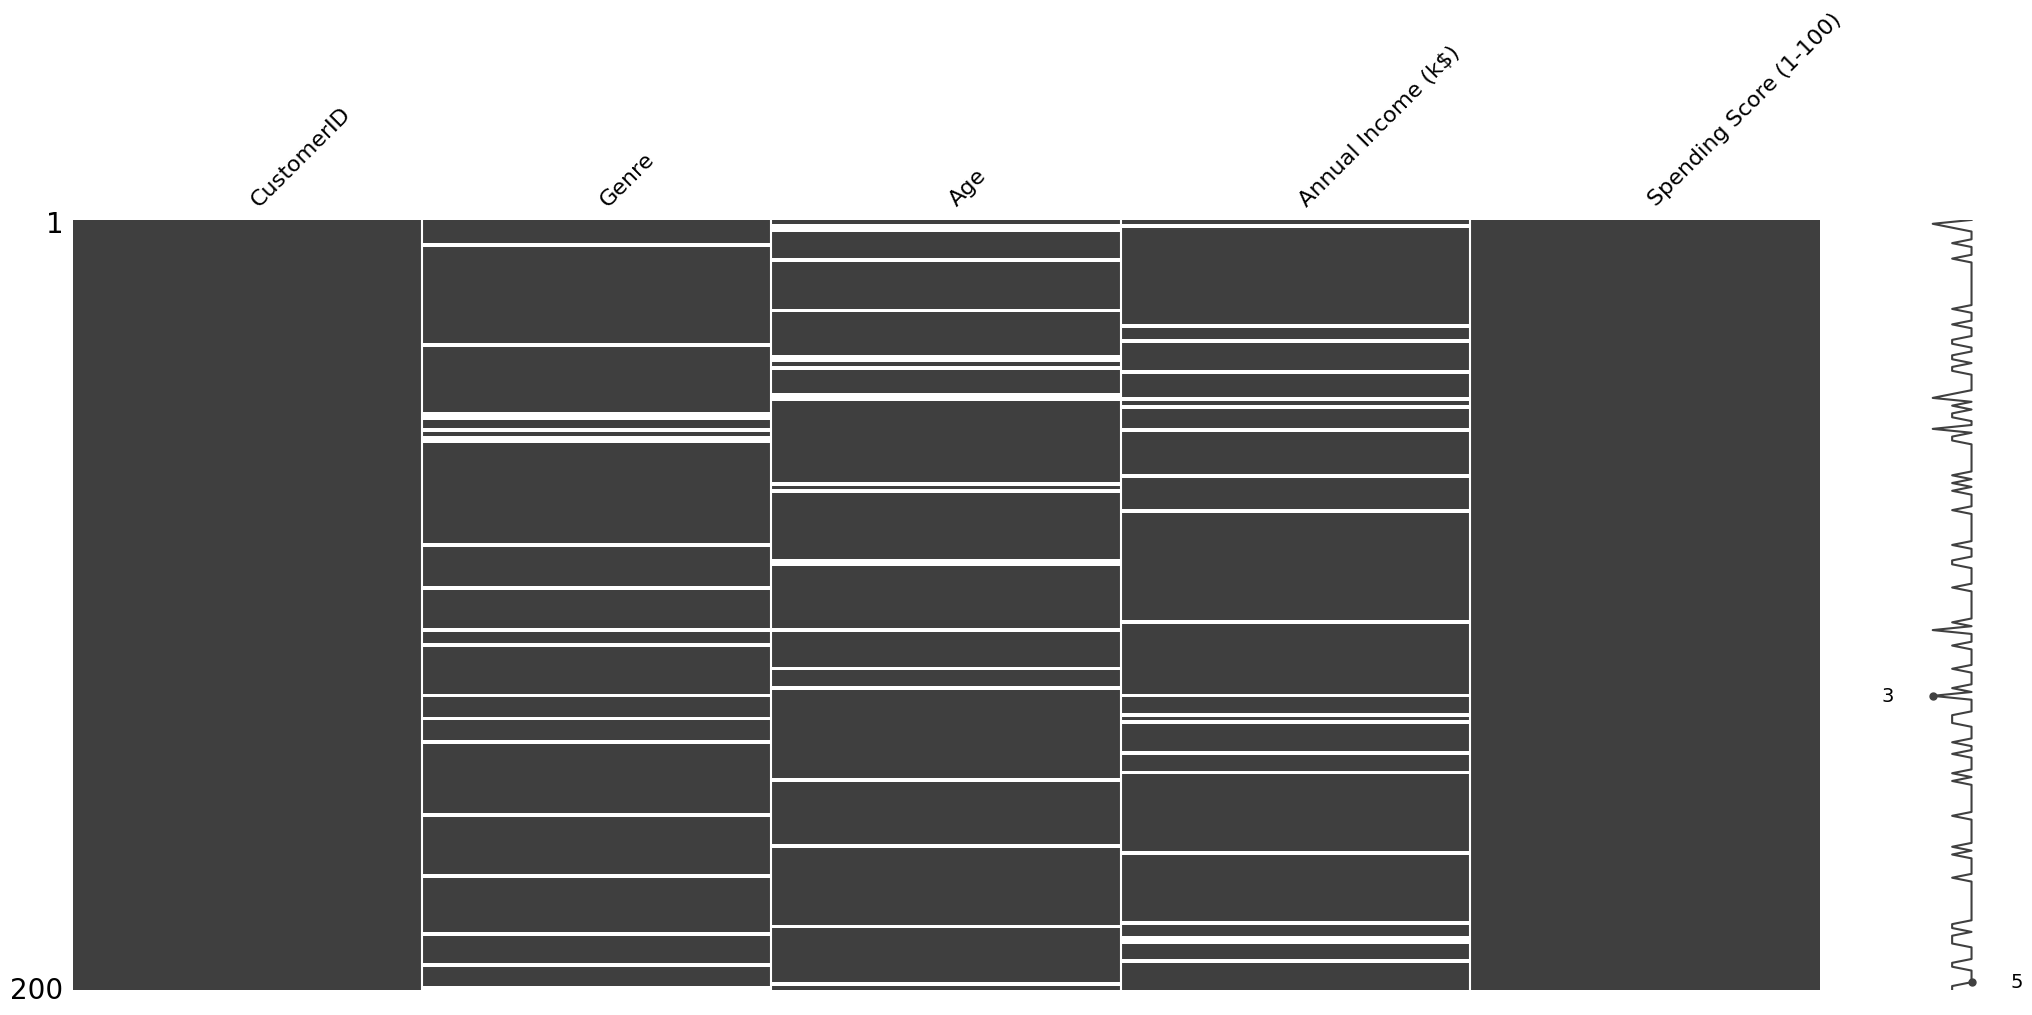

In [342]:
#Проверка на наличие пропусков
msno.matrix(df);  # Матрица пропусков

<Axes: >

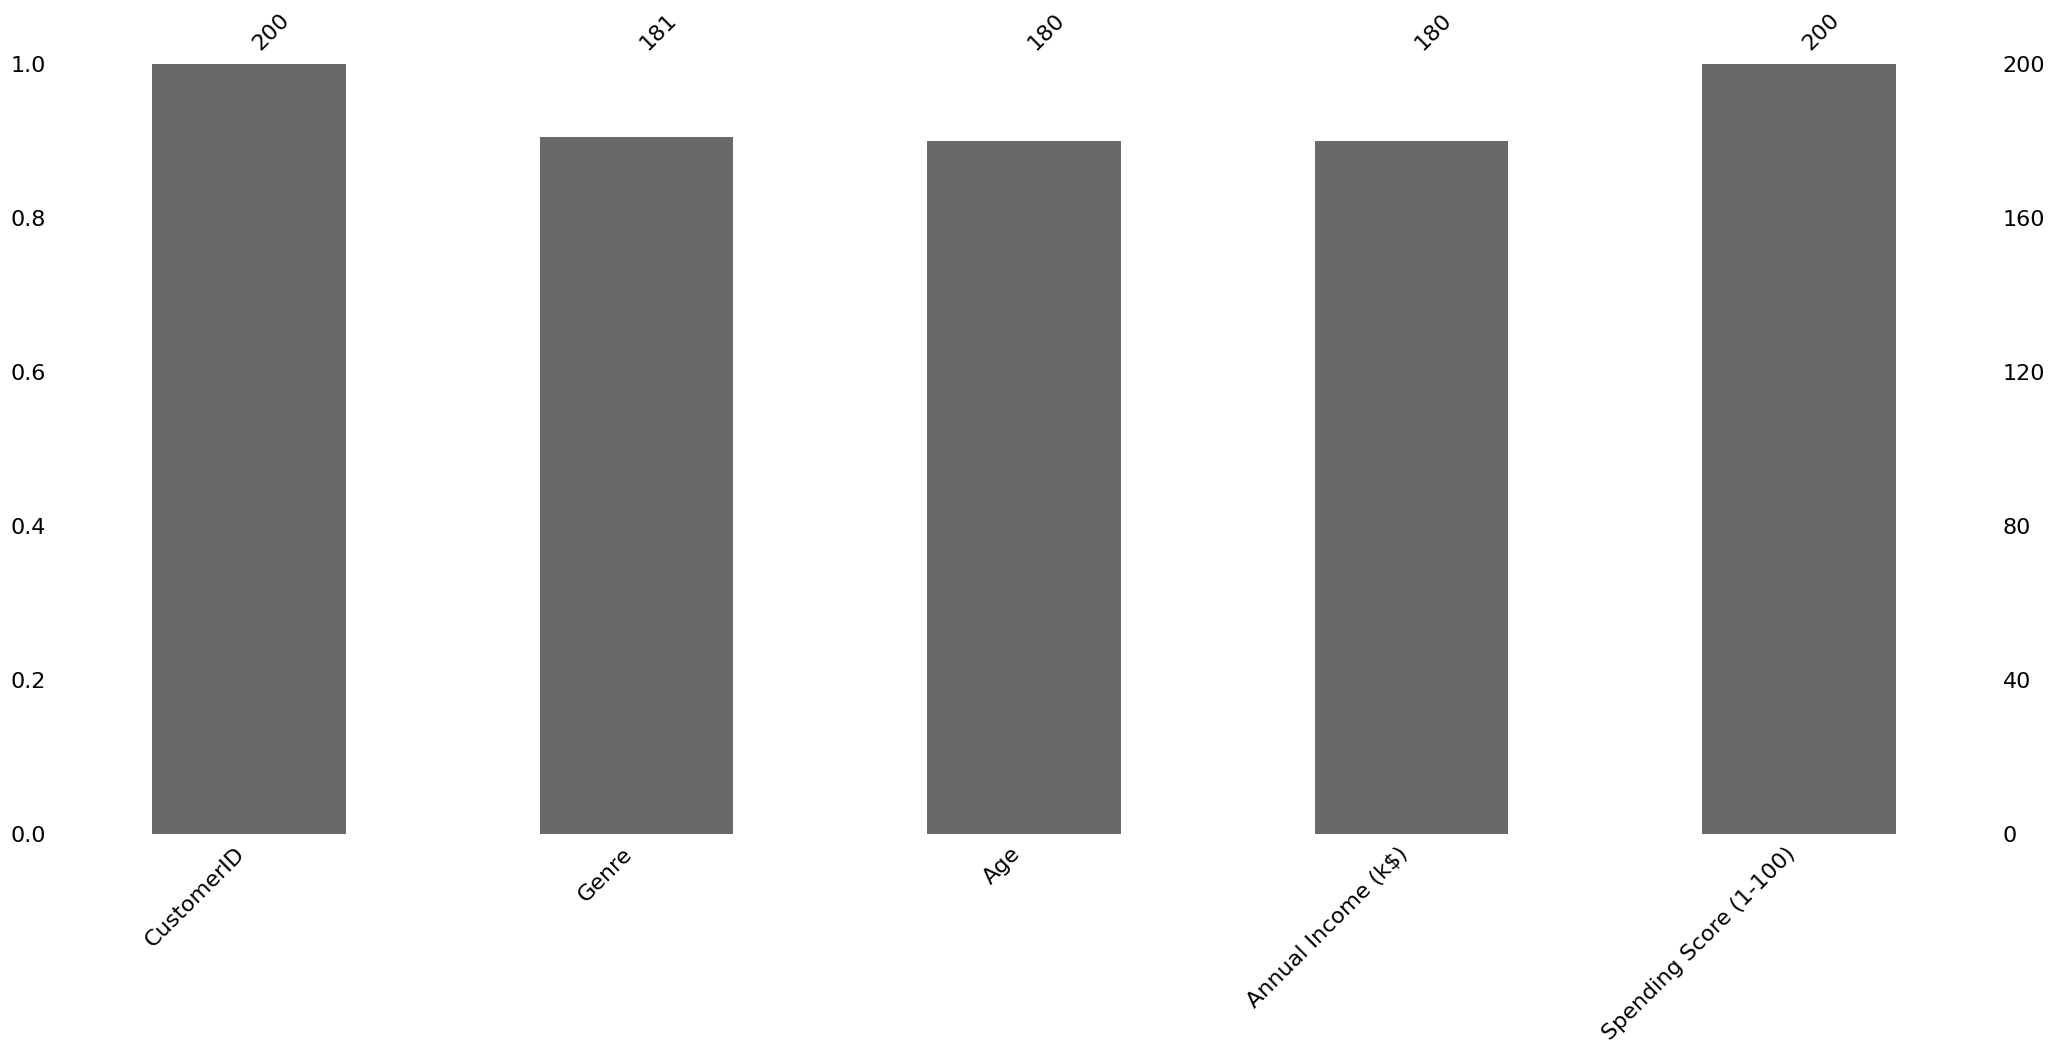

In [343]:
#Столбчатая диаграмма пропусков
msno.bar(df)

In [344]:
for column in df.columns:
    dist_values = len(df[column].unique())
    print(f"{column}: {dist_values} distinct values")

CustomerID: 200 distinct values
Genre: 4 distinct values
Age: 52 distinct values
Annual Income (k$): 65 distinct values
Spending Score (1-100): 84 distinct values


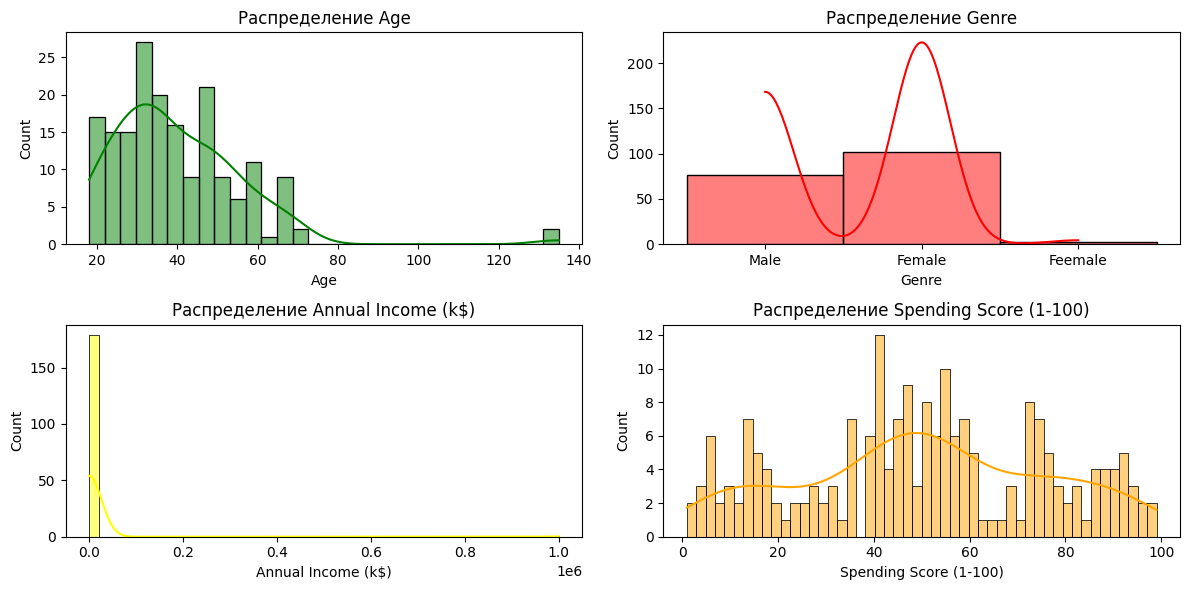

In [345]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title('Распределение Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Genre'], bins=50, kde=True, color='red')
plt.title('Распределение Genre')

plt.subplot(2, 2, 3)
sns.histplot(df['Annual Income (k$)'], bins=50, kde=True, color='yellow')
plt.title('Распределение Annual Income (k$)')

plt.subplot(2, 2, 4)
sns.histplot(df['Spending Score (1-100)'], bins=50, kde=True, color='orange')
plt.title('Распределение Spending Score (1-100)')

plt.tight_layout()
plt.show()


In [346]:
#sns.pairplot(df);

In [347]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,180.000000,39.894444,16.842848,18.000000,29.000000,36.000000,49.000000,135.000000
Annual Income (k$),180.000000,5615.433333,74531.115872,15.000000,42.000000,61.000000,78.000000,1000000.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


Подозрение на наличие выбросов в поле Age (значение 135), и в поле Annual Income (значение 1000000).

In [348]:
df['Annual Income (k$)'].value_counts(sort = False)

,count
Annual Income (k$),
15.0,1
16.0,2
17.0,2
18.0,2
19.0,4
...,...
103.0,4
113.0,1
120.0,2


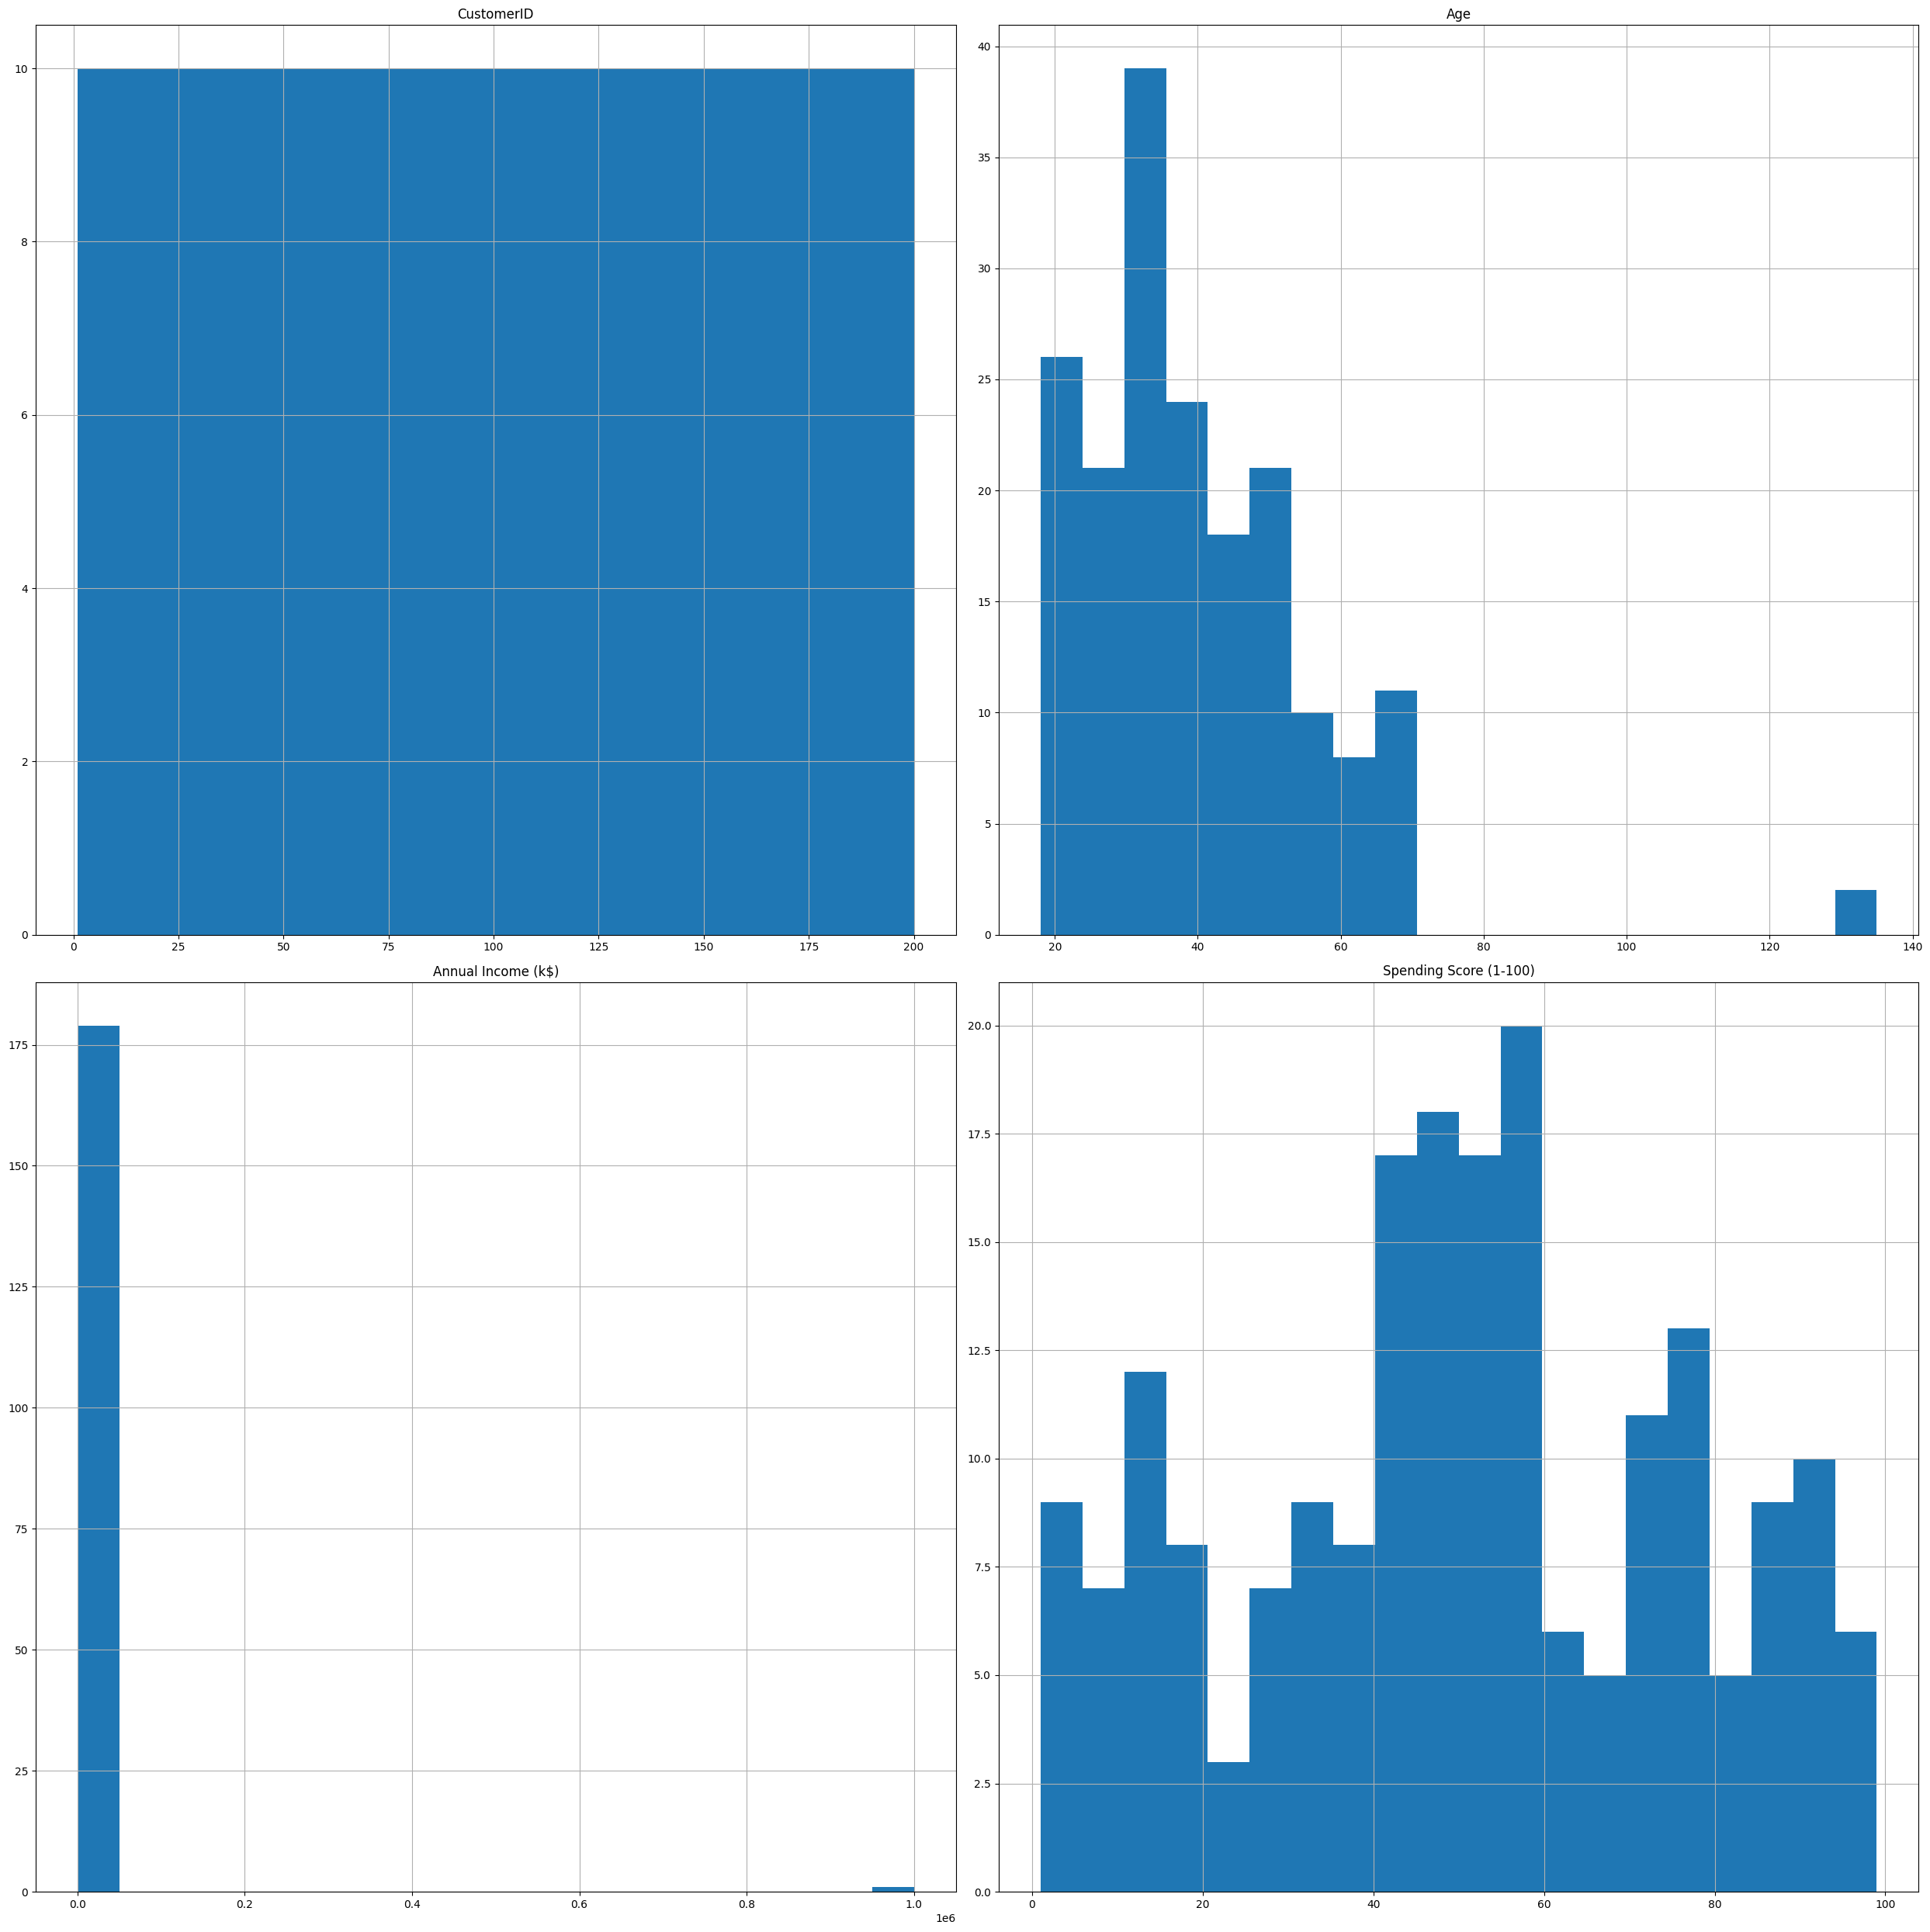

In [349]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(25, 25), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show();

In [350]:
df['Spending Score (1-100)'].value_counts()

,count
Spending Score (1-100),
42,8
55,7
46,6
73,6
35,5
...,...
31,1
44,1
53,1


Выбросов по признаку Spending Score не наблюдаем

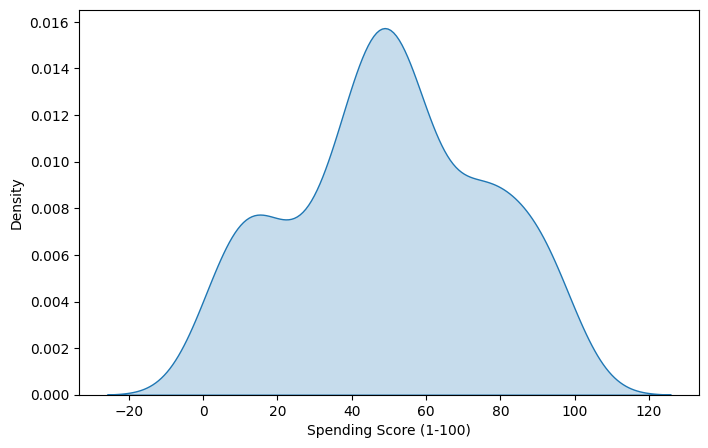

In [351]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Spending Score (1-100)'], fill=True);

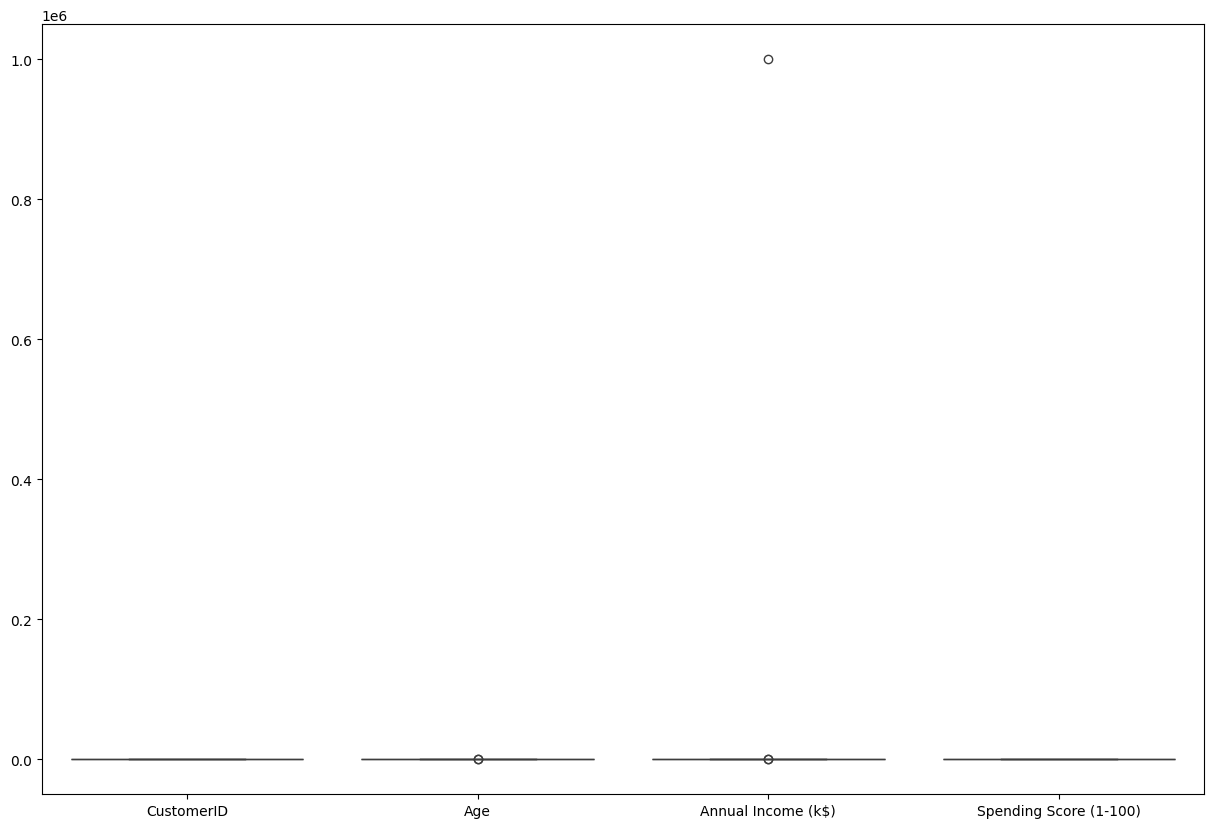

In [352]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, ax=ax)
plt.show()

**Визуализируем датасет**

Создадим копию исходного датасета, удалив пропуски

In [353]:
df_0=df
df_0.dropna()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
5,6,Female,22.0,17.0,76
7,8,Female,23.0,18.0,94
...,...,...,...,...,...
191,192,Female,32.0,103.0,69
194,195,Female,47.0,120.0,16
195,196,Female,35.0,120.0,79
196,197,Female,45.0,126.0,28


In [354]:
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25
  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

In [355]:
df_0['Age'].value_counts()

,count
Age,
32.0,10
35.0,8
31.0,7
30.0,7
49.0,7
19.0,6
40.0,6
47.0,6
23.0,6


Видим в признаке Age 2 значения 135, видимо это выбросы

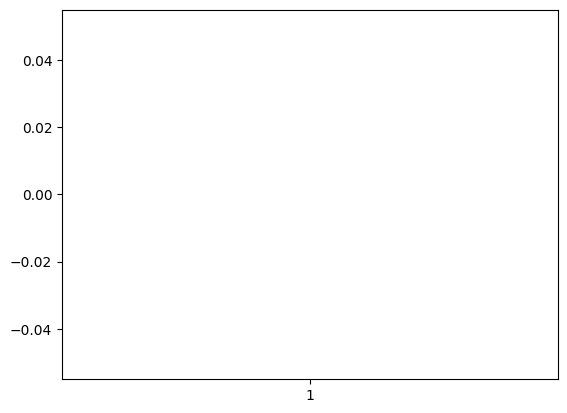

In [356]:
plt.boxplot(df_0.Age)
plt.show()

In [357]:
mpg_bounds = calculate_iqr_boundaries(df_0['Age'])
mpg_bounds

(-1.0, 79.0)

In [358]:
df_0 = df_0[(df_0['Age'] >= mpg_bounds[0]) & (df_0['Age'] <= 3*mpg_bounds[1])]
print(df_0.shape[0])



180


Удаляем 2 объекта с выбросами в признаке Age

In [359]:
df_0['Annual Income (k$)'].value_counts(sort = False)

,count
Annual Income (k$),
15.0,1
16.0,1
17.0,2
18.0,2
19.0,3
...,...
103.0,4
113.0,1
120.0,2


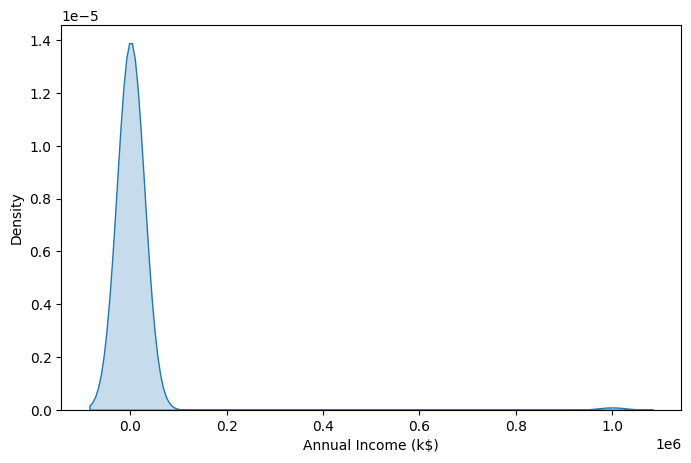

In [360]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_0['Annual Income (k$)'], fill=True);

In [361]:
mpg_bounds = calculate_iqr_boundaries(df_0['Annual Income (k$)'])
mpg_bounds

(-9.5, 130.5)

In [362]:
df_0 = df_0.drop(df_0.loc[(df_0['Annual Income (k$)'] > mpg_bounds[1]*2)].index)
print(df_0.shape[0])

179


Удалили одну строку со сзначением Annual Income 1000000

In [363]:
df_0['Genre'].value_counts(sort = False)

,count
Genre,
Male,68
Female,91
Feemale,2


Видим ошибку ввода данных (Feemale, Female)  в поле Genre

In [364]:
df_0['Genre'] = df_0['Genre'].replace('Feemale','Female')

In [365]:
df_0['Genre'].value_counts(sort = False)

,count
Genre,
Male,68
Female,93


Исправили ошибку ввода данных

Кодируем признак Genre

In [366]:
from sklearn.preprocessing import LabelEncoder

In [367]:
l = LabelEncoder()
df_0['Genre'] = l.fit_transform(df_0['Genre'])

In [368]:
df_0.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CustomerID,179.000000,102.463687,57.394579,1.000000,54.500000,103.000000,151.500000,200.000000
Genre,179.000000,0.581006,0.668620,0.000000,0.000000,0.000000,1.000000,2.000000
Age,179.000000,39.910615,16.888692,18.000000,29.000000,36.000000,49.000000,135.000000
Annual Income (k$),161.000000,60.708075,25.798895,15.000000,43.000000,62.000000,78.000000,137.000000
Spending Score (1-100),179.000000,50.614525,25.481035,1.000000,35.000000,50.000000,73.000000,99.000000


Теперь датасет не содержит выбросы, только пропуски

Визуализируем датасет, заполнив пропуски методом interpolate

In [369]:
from sklearn.decomposition import PCA
import plotly.express as px

In [370]:
df1=df_0.interpolate()

In [371]:
df1.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CustomerID,179.000000,102.463687,57.394579,1.000000,54.500000,103.000000,151.500000,200.000000
Genre,179.000000,0.581006,0.668620,0.000000,0.000000,0.000000,1.000000,2.000000
Age,179.000000,39.910615,16.888692,18.000000,29.000000,36.000000,49.000000,135.000000
Annual Income (k$),179.000000,61.282123,25.742883,15.000000,43.000000,62.000000,78.000000,137.000000
Spending Score (1-100),179.000000,50.614525,25.481035,1.000000,35.000000,50.000000,73.000000,99.000000


Визуализация: целевой признак меняется в соотвествии с цветовой гаммой:

In [372]:
fig = px.scatter_3d(df1, x='Genre', y='Age', z='Annual Income (k$)',
              color='Spending Score (1-100)')
fig.show()


### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Spending Score (1-100)', axis=1),
    df['Spending Score (1-100)'],
    test_size=0.2,
    random_state=1
)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [375]:
X_train.shape


(160, 4)

In [376]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          160 non-null    int64  
 1   Genre               145 non-null    object 
 2   Age                 145 non-null    float64
 3   Annual Income (k$)  142 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.2+ KB


In [377]:
X_train.isnull().sum()

,0
CustomerID,0
Genre,15
Age,15
Annual Income (k$),18


In [378]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [379]:
# Заполнение числовых пропусков медианным значением
imputer = SimpleImputer(strategy='median')
X_train['Age'] = imputer.fit_transform(X_train[['Age']])

In [380]:
# Заполнение пропусков в числовых признаках с помощью KNN
imputer = KNNImputer(n_neighbors=5)
X_train[['Annual Income (k$)']] = imputer.fit_transform(X_train[['Annual Income (k$)']])

In [381]:
X_train['Genre'] = X_train['Genre'].fillna(X_train['Genre'].mode()[0])

In [382]:
X_train.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [383]:
X_train_numeric = X_train[['Age', 'Annual Income (k$)']]

In [384]:
X_train_numeric.head(100)

,Age,Annual Income (k$)
108,68.0,63.000000
107,54.0,63.000000
189,36.0,103.000000
14,37.0,20.000000
56,51.0,44.000000
...,...,...
23,37.0,25.000000
126,43.0,71.000000
9,30.0,19.000000
170,40.0,87.000000


In [385]:
X_train_numeric['Annual Income (k$)'] = pd.to_numeric(X_train_numeric['Annual Income (k$)'], errors='coerce')
X_train_numeric['Age'] = pd.to_numeric(X_train_numeric['Age'], errors='coerce')

In [386]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 160 non-null    float64
 1   Annual Income (k$)  160 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [387]:
# Поиск выбросов с помощью метода квартилей
Q1 = np.percentile(X_train_numeric['Annual Income (k$)'], 25)
Q3 = np.percentile(X_train_numeric['Annual Income (k$)'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers1 = [x for x in X_train_numeric['Annual Income (k$)'] if x < lower_bound or x > upper_bound]

Q1 = np.percentile(X_train_numeric['Age'], 25)
Q3 = np.percentile(X_train_numeric['Age'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers2 = [x for x in X_train_numeric['Age'] if x < lower_bound or x > upper_bound]

In [388]:
# Преобразование outliers1 в DataFrame
outliers1_df = pd.DataFrame({'Annual Income (k$)': outliers1})
outliers1_df

,Annual Income (k$)
0,7101.739437
1,7101.739437
2,137.000000
3,7101.739437
4,7101.739437
5,7101.739437
6,7101.739437
7,7101.739437
8,7101.739437
9,7101.739437


In [389]:
# Преобразование outliers2 в DataFrame
outliers2_df = pd.DataFrame({'Age': outliers2})
outliers2_df

,Age
0,135.0
1,135.0


In [390]:
# Замена выбросов медианой
for i, x in enumerate(outliers1_df):
  if x in outliers1_df:
    outliers1_df[i] = np.median(outliers1_df)

In [391]:
for i, x in enumerate(outliers2_df):
  if x in outliers2_df:
    outliers2_df[i] = np.median(outliers2_df)

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [392]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [393]:
# Создание экземпляров нормализаторов
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [394]:
# Нормализация признаков
X_train_numeric['Age'] = min_max_scaler.fit_transform(X_train[['Age']])
X_train_numeric['Annual Income (k$)'] = standard_scaler.fit_transform(X_train_numeric[['Annual Income (k$)']])

Стратегия: Min-Max Scaling
 Аргументация: Возраст имеет линейную шкалу без выбросов, и для него важно сохранить относительные расстояния между значениями. Min-Max Scaling позволяет масштабировать значения в диапазон [0, 1], сохраняя относительную величину разницы между возрастами.

Стратегия: Z-Score Standardization
 Аргументация: Годовой доход покупателя также имеет линейную шкалу, но может содержать выбросы (например, покупатели с очень высоким доходом). Z-Score Standardization центрирует данные и масштабирует их к стандартному отклонению, что позволяет сгладить влияние выбросов и обеспечить нормальное распределение.

В этом примере мы использовали разные стратегии нормализации для каждого числового признака, основываясь на его свойствах и особенностях данных. Такой подход позволяет оптимизировать производительность моделей машинного обучения и получить более точные результаты

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [395]:
X_train['Genre'].value_counts()


,count
Genre,
Female,92
Male,67
Feemale,1


In [396]:
X_train['Genre'] = X_train['Genre'].fillna(X_train['Genre'].mode()[0])

In [397]:
X_train['Genre'] = X_train['Genre'].replace({'Feemale': 'Female'})
X_train['Genre_coded'] = pd.Categorical(X_train['Genre'], categories=['Female', 'Male'], ordered=True)
X_train['Genre_coded'] = X_train['Genre_coded'].cat.codes

X_train['Genre'].value_counts()

,count
Genre,
Female,93
Male,67


In [398]:
X_train_ct = X_train['Genre_coded']

In [399]:
# Конкатенация по столбцам (axis=1)
X_train = pd.concat([X_train_ct, X_train_numeric], axis=1)

In [400]:
X_train

,Genre_coded,Age,Annual Income (k$)
108,1,0.427350,-0.089354
107,1,0.307692,-0.089354
189,0,0.153846,-0.088847
14,1,0.162393,-0.089900
56,0,0.282051,-0.089596
...,...,...,...
133,0,0.111111,-0.089240
137,1,0.119658,-0.089227
72,0,0.358974,-0.089519
140,0,0.333333,-0.089202


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [401]:
X_test.shape


(40, 4)

In [402]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 58 to 172
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          40 non-null     int64  
 1   Genre               36 non-null     object 
 2   Age                 35 non-null     float64
 3   Annual Income (k$)  38 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


In [403]:
X_test.isnull().sum()

,0
CustomerID,0
Genre,4
Age,5
Annual Income (k$),2


In [404]:
# Заполнение числовых пропусков медианным значением
imputer = SimpleImputer(strategy='median')
X_test['Age'] = imputer.fit_transform(X_test[['Age']])

# Заполнение пропусков в числовых признаках с помощью KNN
imputer = KNNImputer(n_neighbors=5)
X_test[['Annual Income (k$)']] = imputer.fit_transform(X_test[['Annual Income (k$)']])

X_test['Genre'] = X_test['Genre'].fillna(X_test['Genre'].mode()[0])

In [405]:
X_test.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0


In [406]:
X_test_numeric = X_test[['Age', 'Annual Income (k$)']]
X_test

,CustomerID,Genre,Age,Annual Income (k$)
58,59,Female,27.0,46.000000
40,41,Female,65.0,38.000000
34,35,Feemale,49.0,33.000000
102,103,Male,67.0,62.000000
184,185,Female,41.0,99.000000
198,199,Male,36.0,137.000000
95,96,Female,24.0,60.000000
4,5,Female,31.0,17.000000
29,30,Female,23.0,29.000000
168,169,Female,36.0,87.000000


In [407]:
# Поиск выбросов с помощью метода квартилей
Q1 = np.percentile(X_test_numeric['Annual Income (k$)'], 25)
Q3 = np.percentile(X_test_numeric['Annual Income (k$)'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers3 = [x for x in X_test_numeric['Annual Income (k$)'] if x < lower_bound or x > upper_bound]

Q1 = np.percentile(X_test_numeric['Age'], 25)
Q3 = np.percentile(X_test_numeric['Age'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers4 = [x for x in X_test_numeric['Age'] if x < lower_bound or x > upper_bound]

In [408]:
# Преобразование outliers3 в DataFrame
outliers3_df = pd.DataFrame({'Annual Income (k$)': outliers3})
outliers3_df

,Annual Income (k$)


In [409]:
# Преобразование outliers4 в DataFrame
outliers4_df = pd.DataFrame({'Age': outliers4})
outliers4_df

,Age


Выбросов на тестовых данных не наблюдаем.

In [410]:
# Нормализация признаков
X_test_numeric['Age'] = min_max_scaler.fit_transform(X_test[['Age']])
X_test_numeric['Annual Income (k$)'] = standard_scaler.fit_transform(X_test_numeric[['Annual Income (k$)']])

In [411]:
X_test['Genre'].value_counts()

,count
Genre,
Female,29
Male,10
Feemale,1


In [412]:
X_test['Genre'] = X_test['Genre'].replace({'Feemale': 'Female'})
X_test['Genre_coded'] = pd.Categorical(X_test['Genre'], categories=['Female', 'Male'], ordered=True)
X_test['Genre_coded'] = X_test['Genre_coded'].cat.codes

X_test['Genre'].value_counts()

,count
Genre,
Female,30
Male,10


In [413]:
X_test_ct = X_test['Genre_coded']

In [414]:
X_test_ct

,Genre_coded
58,0
40,0
34,0
102,1
184,0
198,1
95,0
4,0
29,0
168,0


In [415]:
# Конкатенация по столбцам (axis=1)
X_test = pd.concat([X_test_ct, X_test_numeric], axis=1)
X_test

,Genre_coded,Age,Annual Income (k$)
58,0,0.130435,-0.537670
40,0,0.956522,-0.818033
34,0,0.608696,-0.993260
102,1,1.000000,0.023056
184,0,0.434783,1.319735
198,1,0.326087,2.651460
95,0,0.065217,-0.047035
4,0,0.217391,-1.553986
29,0,0.043478,-1.133441
168,0,0.326087,0.899191


In [416]:
X_train.shape, X_test.shape

((160, 3), (40, 3))